<a href="https://colab.research.google.com/github/mikolajskalka/WinemagDataClosestWines/blob/main/WinemagDataClosestWines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### WINEMAG DATA ###

In this dataset I am presenting the use of count vectorizer and different metrics of calculating distance between vectors to investigate it's usability in finding the closest wines in terms of variety and region based on their descriptions.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

Getting rid of the collums that I do not plan to use for readibility purposes.

In [ ]:
winemag = pd.read_csv('winemag.csv')
winemag.drop(axis=1, labels="Unnamed: 0", inplace=True)
winemag.drop(axis=1, labels="region_2", inplace=True)
winemag.drop(axis=1, labels="designation", inplace=True)
winemag.drop(axis=1, labels="price", inplace=True)
winemag.drop(axis=1, labels="taster_twitter_handle", inplace=True)
winemag.head()

,country,description,points,province,region_1,taster_name,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,Sicily & Sardinia,Etna,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,Douro,NaN,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,Oregon,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [ ]:
len(winemag)

129971

## 1: Extract word count vectors

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(token_pattern=r"(?u)\b\w+\b")
WCmatrix = vectorizer.fit_transform(winemag['description'])

In [ ]:
winemag_sorted = winemag.sort_values(by="points", ascending=False)
winemag_sorted.head(5)

,country,description,points,province,region_1,taster_name,title,variety,winery
114972,Portugal,"A powerful and ripe wine, strongly influenced ...",100,Port,NaN,Roger Voss,Quinta do Noval 2011 Nacional Vintage (Port),Port,Quinta do Noval
89729,France,This new release from a great vintage for Char...,100,Champagne,Champagne,Roger Voss,Salon 2006 Le Mesnil Blanc de Blancs Brut Char...,Chardonnay,Salon
113929,US,In 2005 Charles Smith introduced three high-en...,100,Washington,Columbia Valley (WA),Paul Gregutt,Charles Smith 2006 Royal City Syrah (Columbia ...,Syrah,Charles Smith
45781,Italy,"This gorgeous, fragrant wine opens with classi...",100,Tuscany,Brunello di Montalcino,Kerin O’Keefe,Biondi Santi 2010 Riserva (Brunello di Montal...,Sangiovese,Biondi Santi
123545,US,Initially a rather subdued Frog; as if it has ...,100,Washington,Walla Walla Valley (WA),Paul Gregutt,Cayuse 2008 Bionic Frog Syrah (Walla Walla Val...,Syrah,Cayuse


## 2: Find nearest neighbors

**a)** I started by choosing one wine from above table sorted by "points". The purpose of this operation is to have one point of reference to mesure distance between that point and the other records. 

In [ ]:
title = winemag.loc[89729]["title"]
winemag.loc[winemag["title"] == title]

,country,description,points,province,region_1,taster_name,title,variety,winery
89729,France,This new release from a great vintage for Char...,100,Champagne,Champagne,Roger Voss,Salon 2006 Le Mesnil Blanc de Blancs Brut Char...,Chardonnay,Salon


In [ ]:
from sklearn.metrics import pairwise_distances


dist = pairwise_distances(X=WCmatrix.getrow(winemag.loc[winemag["title"] == title].index.values[0]), Y=WCmatrix, metric='euclidean')


In [ ]:
winemag['BO-eucl'] = dist.flatten()
winemag_sorted = winemag.sort_values(by='BO-eucl', axis=0)
winemag_sorted.head(5)

,country,description,points,province,region_1,taster_name,title,variety,winery,BO-eucl
89729,France,This new release from a great vintage for Char...,100,Champagne,Champagne,Roger Voss,Salon 2006 Le Mesnil Blanc de Blancs Brut Char...,Chardonnay,Salon,0.000000
102086,France,"From the smallest of the Beaujolais crus, this...",87,Beaujolais,Chénas,Roger Voss,Henry Fessy 2015 Chénas,Gamay,Henry Fessy,7.483315
49019,France,"From the smallest of the Beaujolais crus, this...",87,Beaujolais,Chénas,Roger Voss,Henry Fessy 2015 Chénas,Gamay,Henry Fessy,7.483315
43250,France,"This is a young, fruity wine with black curran...",87,Bordeaux,Blaye Côtes de Bordeaux,Roger Voss,Château Haut Millet 2016 Vieilles Vignes (Bla...,Bordeaux-style Red Blend,Château Haut Millet,7.549834
76418,France,This is a stylish Blanc de Blancs in all but n...,90,Burgundy,Crémant de Bourgogne,Roger Voss,Bailly-Lapierre NV Brut (Crémant de Bourgogne),Chardonnay,Bailly-Lapierre,7.549834


As we can see in the above table first five nearest neighbors of "Salon 2006 Le Mesnil Blanc de Blancs Brut Chardonnay" are described by the same person - Roger Voss. That is interesting, because one person may be using particular words to describe wines. What is worth noting is that all of the above are french wines, 3 of 4 closest neighbors are from different region and are red wines, so rather far away from champagne. At least 1 of 4 NNs is sparkling wine made of chardonnay so much closer than reds.

In [ ]:
for e in winemag_sorted[:5].index:
  print(winemag.iloc[e]['title'])
  print(winemag.iloc[e]['description'])
  print("----------------------")

Salon 2006 Le Mesnil Blanc de Blancs Brut Chardonnay (Champagne)
This new release from a great vintage for Chardonnay in Champagne is a perfect blanc de blancs, showing a wealth of intensity from the crisp, chalky, mineral tones to the perfumed apple notes. The aromas hint at developing toastiness that adds depth and complexity. The wine is still young and it will age for years. Drink from 2020.
----------------------
Henry Fessy 2015  Chénas
From the smallest of the Beaujolais crus, this wine is structured, layering tannins with black fruits and acidity. It is a wine to age at least for a couple of years. Drink from 2018.
----------------------
Henry Fessy 2015  Chénas
From the smallest of the Beaujolais crus, this wine is structured, layering tannins with black fruits and acidity. It is a wine to age at least for a couple of years. Drink from 2018.
----------------------
Château Haut Millet 2016 Vieilles Vignes  (Blaye Côtes de Bordeaux)
This is a young, fruity wine with black curran

In 4 of the above descriptions potential for ageing is mentioned. This is probably the reason why those three red wines had so good score.

If descriptions contained more taste descriptive words such thing wouldn't probably happen.

I decided to see how many tasters are included in dataset and how destcription style may impact distance mesurement.

In [ ]:
winemag.groupby("taster_name").count()

,country,description,points,province,region_1,title,variety,winery,BO-eucl
taster_name,,,,,,,,,
Alexander Peartree,415,415,415,415,401,415,415,415,415
Anna Lee C. Iijima,4415,4415,4415,4415,2448,4415,4415,4415,4415
Anne Krebiehl MW,3676,3685,3685,3676,1395,3685,3685,3685,3685
Carrie Dykes,139,139,139,139,139,139,139,139,139
Christina Pickard,6,6,6,6,6,6,6,6,6
Fiona Adams,27,27,27,27,18,27,27,27,27
Jeff Jenssen,469,491,491,469,0,491,491,491,491
Jim Gordon,4177,4177,4177,4177,4171,4177,4177,4177,4177
Joe Czerwinski,5145,5147,5147,5145,3406,5147,5147,5147,5147


In [ ]:
winemag["taster_name"].nunique()

19

In [ ]:
len(winemag.loc[winemag["taster_name"] == "Roger Voss"]) / len(winemag)

0.1963053296504605

As it is shown above, there are 19 tasters included in this dataset, but Roger Voss is the author of almost 20% of descriptions in dataset. It is clear that his style and vocabulary might be most impactful for measurements.

**b)** To verify my hypothesis from above I wanted to mesure distance between three similar wines, but I wanted description to be writen by three different people.

In [ ]:
wines_sorted = winemag.loc[(winemag["taster_name"] == "Joe Czerwinski") & (winemag["region_1"] == "Champagne")]
wines_sorted.sort_values(by="points", axis=0, ascending=False).head(5)

,country,description,points,province,region_1,taster_name,title,variety,winery,BO-eucl
18792,France,Still seems quite young—or maybe it will alway...,93,Champagne,Champagne,Joe Czerwinski,Salon 1988 Le Mesnil Blanc de Blancs Brut Char...,Chardonnay,Salon,9.165151
43871,France,"A lightly creamy rosé, this wine merely hints ...",88,Champagne,Champagne,Joe Czerwinski,Taittinger NV Prestige Brut Rosé (Champagne),Champagne Blend,Taittinger,9.486833
10202,France,Fragrant; dusty plum and rose aromas are follo...,87,Champagne,Champagne,Joe Czerwinski,Ruinart NV Brut Rosé (Champagne),Champagne Blend,Ruinart,9.591663
10203,France,The extremely pale copper color is reminiscent...,86,Champagne,Champagne,Joe Czerwinski,Louis Roederer 1994 Brut Rosé (Champagne),Champagne Blend,Louis Roederer,9.165151
75543,France,Champagne producers pick Pinot Noir for sparkl...,83,Champagne,Champagne,Joe Czerwinski,Laurent-Perrier NV Cuvée Brut Rosé (Champagne),Champagne Blend,Laurent-Perrier,9.899495


In [ ]:
wines_sorted = winemag.loc[(winemag["taster_name"] == "Paul Gregutt") & (winemag["region_1"] == "Champagne")]
wines_sorted.sort_values(by="points", axis=0, ascending=False).head(5)

,country,description,points,province,region_1,taster_name,title,variety,winery,BO-eucl
102865,France,"One expects elegance, grace and precision from...",95,Champagne,Champagne,Paul Gregutt,Laurent-Perrier NV Grand Siècle La Cuvée Brut ...,Champagne Blend,Laurent-Perrier,9.433981
102869,France,"Sharp, spicy fruit flavors lead into a thick, ...",92,Champagne,Champagne,Paul Gregutt,Heidsieck & Co Monopole NV Extra Dry (Champagne),Champagne Blend,Heidsieck & Co Monopole,9.848858
73877,France,"Light and elegant, this spicy, lively wine is ...",92,Champagne,Champagne,Paul Gregutt,Jacquart NV Brut Mosaïque (Champagne),Champagne Blend,Jacquart,9.486833
73878,France,"Jacquart makes a full-bodied, ripe style of Ch...",92,Champagne,Champagne,Paul Gregutt,Jacquart 1992 Cuvée Mosaïque (Champagne),Champagne Blend,Jacquart,10.954451
53491,France,Abelé lays claim to being the third-oldest Cha...,92,Champagne,Champagne,Paul Gregutt,Henri Abele NV Brut (Champagne),Champagne Blend,Henri Abele,9.219544


I managed to find two almost identical wines, but different vintage and the description is made by two different people. The third one is also champagne, however it is not single variety, but blend.

My picks for comparison:


1.   Salon 2006 Le Mesnil Blanc de Blancs Brut Chardonay by Roger Voss
2.   Salon 1988 Le Mesnil Blanc de Blancs Brut Chardonay by Joe Czerwinski
3.   Laurent-Perrier NV Grand Siècle La Cuvée Brut by Paul Gregutt




Below a preview of descriptions of above wines.

In [ ]:
for e in [89729, 18792, 102865]:
  print(winemag.iloc[e]['title'])
  print(winemag.iloc[e]['description'])
  print("----------------------")

Salon 2006 Le Mesnil Blanc de Blancs Brut Chardonnay (Champagne)
This new release from a great vintage for Chardonnay in Champagne is a perfect blanc de blancs, showing a wealth of intensity from the crisp, chalky, mineral tones to the perfumed apple notes. The aromas hint at developing toastiness that adds depth and complexity. The wine is still young and it will age for years. Drink from 2020.
----------------------
Salon 1988 Le Mesnil Blanc de Blancs Brut Chardonnay (Champagne)
Still seems quite young—or maybe it will always be a little tight and austere, especially next to its voluptuous older sibling, the '85. Biscuity and yeasty, with an angularity that refreshes the palate.
----------------------
Laurent-Perrier NV Grand Siècle La Cuvée Brut  (Champagne)
One expects elegance, grace and precision from this prestige cuvée, and this wine delivers that and much more. There is a refined complexity running through it, from the cascading tiny bubbles to the lush, toasty nose to the de

In [ ]:
# 89729 - Roger Voss - Salon 2006 Le Mesnil Blanc de Blancs Brut Chardonay
# 18792 - Joe Czerwiński - Salon 1988 Le Mesnil Blanc de Blancs Brut Chardonay
# 102865 - Paul Gregutt - Laurent-Perrier NV Grand Siècle La Cuvée Brut

RV_JC_champagne_dist = pairwise_distances(X=WCmatrix.getrow(winemag.loc[winemag["title"] == title].index.values[0]), 
                                          Y=WCmatrix.getrow(18792), metric='euclidean')
RV_PG_champagne_dist = pairwise_distances(X=WCmatrix.getrow(winemag.loc[winemag["title"] == title].index.values[0]), 
                                          Y=WCmatrix.getrow(102865), metric='euclidean')
JC_PG_champagne_dist = pairwise_distances(X=WCmatrix.getrow(18792), 
                                          Y=WCmatrix.getrow(102865), metric='euclidean')

print(f"RV - JC champagne desc dist : {RV_JC_champagne_dist}")
print(f"RV - PG champagne desc dist : {RV_PG_champagne_dist}")
print(f"JC - PG champagne desc dist : {JC_PG_champagne_dist}")

RV - JC champagne desc dist : [[9.16515139]]
RV - PG champagne desc dist : [[9.43398113]]
JC - PG champagne desc dist : [[9.]]


In [ ]:
winemag["BO-eucl"].max()

19.595917942265423

As the data above shows these wines descriptions are not that far away from each other. But thing worth noting is that max euclidean distance in that set isn't huge. So compared wines are in the middle of the scale.

Also, one would expect that these two Salon's vintage champagnes will be very close to each other. On the other hand this descriptions are short and there are not much descriptive words apart from [the, from, a, is] and similar.

**c)** Here we will find out what words have most ocurances among three considered descriptions.

In [ ]:
def top_words(name):
    """
    Get a table of the most frequent words in the given person's wikipedia page.
    """
    # print(type(winemag.loc[name]['description']))
    matrix = vectorizer.transform(winemag.loc[winemag.index == name]['description']).sum(axis=0)
    d = {'count' : matrix.flat}
    df = pd.DataFrame(data=d, index=vectorizer.get_feature_names())
    df = df.loc[df['count'] != 0]
    
    return df.sort_values(by='count',ascending=False)

In [ ]:
roger_voss = 89729
joe_cz = 18792
paul_gregutt = 102865

In [ ]:
rv_words = top_words(roger_voss)
print(len(rv_words))
rv_words.sort_values(by="count", ascending=False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


48


,count
the,4
from,3
a,3
is,2
and,2
for,2
chardonnay,1
adds,1
age,1
apple,1


In [ ]:
joe_cz_words = top_words(joe_cz)
print(len(joe_cz_words))
joe_cz_words.sort_values(by="count", ascending=False)

32


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,count
and,2
the,2
always,1
an,1
angularity,1
austere,1
be,1
biscuity,1
especially,1
it,1


Here similarly to main exercise, I tried to obtain a list of words with most occurances among two vintages of Salon's champagne.

In [ ]:
# Modify the code to avoid error.

common_words = rv_words.join(joe_cz_words, lsuffix='_rv', rsuffix='_joe_cz', how='inner')
print(len(common_words))
common_words.sort_values(by='count_joe_cz', ascending=False)

9


,count_rv,count_joe_cz
the,4,2
and,2,2
a,3,1
still,1,1
to,1,1
will,1,1
that,1,1
it,1,1
young,1,1


In [ ]:
paul_gregutt_words = top_words(paul_gregutt)
# Modify the code to avoid error.
rv_words.join(paul_gregutt_words,  how='inner', lsuffix='_rv', rsuffix='_gregutt').sort_values(by='count_rv', ascending=False).head(10)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,count_rv,count_gregutt
the,4,3
a,3,2
from,3,2
is,2,1
and,2,4
this,1,2
to,1,3
wine,1,1
that,1,1
it,1,1


Even though common words are swamping out important subtle differences, commonalities in rarer more descriptive words still matter on the margin. But in so short descriptions the number of influential words is small. Moreover the dominant words are occuring among probably almost all descriptions.

In [ ]:
# It might be helpful to use:
word_to_ind={v: i for i, v in enumerate(vectorizer.get_feature_names())} # a dictionary with words as keys and indices as values

common_words.sort_values(by='count_rv', ascending=False)
indexes_ = [word_to_ind[e] for e in common_words.index]
descriptions_indexes = []
matrix = WCmatrix[:, indexes_]

for i in range(matrix.shape[0]):
  if len(matrix.getrow(i).data) == 9: 
    descriptions_indexes.append(i)

descriptions = winemag.loc[descriptions_indexes]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
descriptions[['title', 'variety', 'taster_name']]

,title,variety,taster_name
157,Casa Santa Vitória 2013 Grande Reserva Tinto R...,Portuguese Red,Roger Voss
511,Boude Baudin 2010 Cuvée St Clément (Champagne),Champagne Blend,Roger Voss
4484,Domaine Henri Delagrange 2014 Vieilles Vignes ...,Pinot Noir,Roger Voss
5665,Georges Duboeuf 2015 Domaine de Roche Noire (...,Gamay,Roger Voss
7121,Yohan Lardy 2014 Les Michelons (Moulin-à-Vent),Gamay,Roger Voss
8217,Patrick Javillier 2011 Les Clousots (Meursault),Chardonnay,Roger Voss
9547,Château du Cèdre 2014 Malbec (Cahors),Malbec,Roger Voss
9657,Adega de Favaios 2012 Casa Velha Colheita Sele...,Portuguese Red,Roger Voss
16723,Château Lestruelle 2016 Bordeaux Blanc,Bordeaux-style White Blend,Roger Voss
17972,Domaine de la Bégude 2014 La Bégude Red (Bandol),Provence red blend,Roger Voss


In [ ]:
descriptions.groupby("variety").count()

,country,description,points,province,region_1,taster_name,title,winery,BO-eucl
variety,,,,,,,,,
Bordeaux-style Red Blend,3,3,3,3,3,3,3,3,3
Bordeaux-style White Blend,3,3,3,3,3,3,3,3,3
Bual,1,1,1,1,0,1,1,1,1
Cabernet Franc,2,2,2,2,2,2,2,2,2
Cabernet Sauvignon,1,1,1,1,1,0,1,1,1
Champagne Blend,5,5,5,5,5,5,5,5,5
Chardonnay,6,6,6,6,6,6,6,6,6
Chenin Blanc,1,1,1,1,1,1,1,1,1
Gamay,4,4,4,4,4,4,4,4,4


In [ ]:
descriptions.groupby("region_1").count()

,country,description,points,province,taster_name,title,variety,winery,BO-eucl
region_1,,,,,,,,,
Bandol,1,1,1,1,1,1,1,1,1
Bordeaux Blanc,2,2,2,2,2,2,2,2,2
Cahors,1,1,1,1,1,1,1,1,1
Chablis,1,1,1,1,1,1,1,1,1
Champagne,8,8,8,8,8,8,8,8,8
Chinon,2,2,2,2,2,2,2,2,2
Chénas,1,1,1,1,1,1,1,1,1
Crémant d'Alsace,1,1,1,1,1,1,1,1,1
Fronton,1,1,1,1,1,1,1,1,1


In [ ]:
descriptions.groupby("taster_name").count()

,country,description,points,province,region_1,title,variety,winery,BO-eucl
taster_name,,,,,,,,,
Joe Czerwinski,1,1,1,1,1,1,1,1,1
Paul Gregutt,2,2,2,2,2,2,2,2,2
Roger Voss,49,49,49,49,35,49,49,49,49


As it is shown above, dominant taster is the one I chose as a reference description. Almost all records are written by him.

As of region and variety there are no clear rule, occurences are pretty even among different categories.

## 3: TF-IDF to the rescue

It is pretty clear after the section above that euclidean mesure is not realy effective in that case. So let's try TF-IDF method.

In [ ]:
# We could use:
    # from sklearn.feature_extraction.text import TfidfVectorizer
# but since we already know how to compute CountVectorizer, let's use:
from sklearn.feature_extraction.text import TfidfTransformer

vectorizer = CountVectorizer(token_pattern=r"(?u)\b\w+\b")
WCmatrix = vectorizer.fit_transform(winemag['description'])

tfidf=TfidfTransformer(smooth_idf=False, norm=None)
TFIDFmatrix = tfidf.fit_transform(WCmatrix)

In [ ]:
dist = pairwise_distances(X=TFIDFmatrix.getrow(roger_voss), Y=TFIDFmatrix, metric='euclidean')
# add the distances as a column in the wiki dataframe

winemag['BO-eucl-TF-IDF'] = dist.tolist()[0]
winemag_sorted = winemag.sort_values(by='BO-eucl-TF-IDF', axis=0)
winemag_sorted.head(10)

,country,description,points,province,region_1,taster_name,title,variety,winery,BO-eucl,BO-eucl-TF-IDF
89729,France,This new release from a great vintage for Char...,100,Champagne,Champagne,Roger Voss,Salon 2006 Le Mesnil Blanc de Blancs Brut Char...,Chardonnay,Salon,0.000000,0.000000
43250,France,"This is a young, fruity wine with black curran...",87,Bordeaux,Blaye Côtes de Bordeaux,Roger Voss,Château Haut Millet 2016 Vieilles Vignes (Bla...,Bordeaux-style Red Blend,Château Haut Millet,7.549834,31.503820
78358,France,This is a rich wine with good citrus and crisp...,91,Burgundy,Meursault,Roger Voss,Domaine Jacques Prieur 2014 Santenots Premier ...,Chardonnay,Domaine Jacques Prieur,7.810250,31.934109
21004,France,"Light and crisp, this wine has citrus and gree...",85,Burgundy,Mâcon-Villages,Roger Voss,Jean-Luc and Paul Aegerter 2016 Petit Vallons ...,Chardonnay,Jean-Luc and Paul Aegerter,8.831761,32.036387
29938,Portugal,"Ripe with red-berry flavors, this wine is fres...",85,Douro,NaN,Roger Voss,Quinta Dona Matilde 2014 Tinto Red (Douro),Portuguese Red,Quinta Dona Matilde,9.165151,32.057128
81098,France,"This is a soft, simple wine with apple and cit...",84,Loire Valley,Sancerre,Roger Voss,Hervé Baudry 2015 Romana (Sancerre),Sauvignon Blanc,Hervé Baudry,8.602325,32.189254
59472,France,"Rich, structured and juicy, this wine shows bl...",90,Bordeaux,Côtes de Bordeaux,Roger Voss,Château La Grange Clinet 2015 Côtes de Bordeaux,Bordeaux-style Red Blend,Château La Grange Clinet,9.165151,32.266562
7049,Portugal,A sweet rosé that is light and fresh from the ...,84,Vinho Verde,NaN,Roger Voss,Quintas de Melgaço 2014 Lagar Rosé (Vinho Verde),Rosé,Quintas de Melgaço,8.185353,32.283956
75285,Portugal,"This young, fruity wine is crisp with acidity ...",84,Tejo,NaN,Roger Voss,Quinta do Casal Branco 2016 Terra de Lobos Bra...,Portuguese White,Quinta do Casal Branco,8.602325,32.343332
85973,France,"This is fruity, with a hint of the vintage's c...",86,Burgundy,Chablis,Roger Voss,L. Tramier & Fils 2011 Chablis,Chardonnay,L. Tramier & Fils,8.426150,32.357016


In [ ]:
winemag_sorted['BO-eucl-TF-IDF'].max()

89.97671059021508

This mesure doesn't look much more effective for this case. There are more whites in the closest neighbors, two chardonnays in the top 3. Many french wines, but most importantly only one tester present in top 10.

In [ ]:
def top_words_tf_idf(name):
    """
    Get a table of the largest tf-idf words in the given person's wikipedia page.
    """
    matrix = vectorizer.transform(winemag.loc[winemag.index == name]['description'])
    IDFmatrix = tfidf.transform(matrix)
    d = {'tf-idf' : IDFmatrix.data}
    i = []
    for e in IDFmatrix.indices:  
      i.append(vectorizer.get_feature_names()[e])
    
    df = pd.DataFrame(data=d, index=i)
    
    return df.sort_values(by='tf-idf',ascending=False)

In [ ]:
rv_tf_idf = top_words_tf_idf(roger_voss)
joe_cz_tf_idf = top_words_tf_idf(joe_cz)
common_words = rv_tf_idf.join(joe_cz_tf_idf, lsuffix='_rv', rsuffix='_joe_cz', how='inner')
print(f"word count : {len(common_words)}")
common_words.sort_values(by='tf-idf_rv', ascending=False).head(15)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


word count : 9


,tf-idf_rv,tf-idf_joe_cz
the,4.854280,2.427140
young,4.402899,4.402899
still,4.130712,4.130712
will,3.821556,3.821556
a,3.704074,1.234691
that,2.298962,2.298962
and,2.042363,2.042363
to,2.040868,2.040868
it,1.693524,1.693524


In [ ]:
# It might be helpful to use:
word_to_ind={v: i for i, v in enumerate(vectorizer.get_feature_names())} # a dictionary with words as keys and indices as values
indexes_ = [word_to_ind[e] for e in common_words.index] 
descriptions_indexes_idf = []

matrix = WCmatrix[:, indexes_]
for i in range(matrix.shape[0]):
  if len(matrix.getrow(i).data) == 9: 
    descriptions_indexes_idf.append(i)

descriptions = winemag.loc[descriptions_indexes_idf]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
descriptions[['title', 'variety', 'taster_name']]

,title,variety,taster_name
157,Casa Santa Vitória 2013 Grande Reserva Tinto R...,Portuguese Red,Roger Voss
511,Boude Baudin 2010 Cuvée St Clément (Champagne),Champagne Blend,Roger Voss
4484,Domaine Henri Delagrange 2014 Vieilles Vignes ...,Pinot Noir,Roger Voss
5665,Georges Duboeuf 2015 Domaine de Roche Noire (...,Gamay,Roger Voss
7121,Yohan Lardy 2014 Les Michelons (Moulin-à-Vent),Gamay,Roger Voss
8217,Patrick Javillier 2011 Les Clousots (Meursault),Chardonnay,Roger Voss
9547,Château du Cèdre 2014 Malbec (Cahors),Malbec,Roger Voss
9657,Adega de Favaios 2012 Casa Velha Colheita Sele...,Portuguese Red,Roger Voss
16723,Château Lestruelle 2016 Bordeaux Blanc,Bordeaux-style White Blend,Roger Voss
17972,Domaine de la Bégude 2014 La Bégude Red (Bandol),Provence red blend,Roger Voss


In [ ]:
descriptions.groupby("variety").count()

,country,description,points,province,region_1,taster_name,title,winery,BO-eucl,BO-eucl-TF-IDF
variety,,,,,,,,,,
Bordeaux-style Red Blend,3,3,3,3,3,3,3,3,3,3
Bordeaux-style White Blend,3,3,3,3,3,3,3,3,3,3
Bual,1,1,1,1,0,1,1,1,1,1
Cabernet Franc,2,2,2,2,2,2,2,2,2,2
Cabernet Sauvignon,1,1,1,1,1,0,1,1,1,1
Champagne Blend,5,5,5,5,5,5,5,5,5,5
Chardonnay,6,6,6,6,6,6,6,6,6,6
Chenin Blanc,1,1,1,1,1,1,1,1,1,1
Gamay,4,4,4,4,4,4,4,4,4,4


In [ ]:
descriptions.groupby("region_1").count()

,country,description,points,province,taster_name,title,variety,winery,BO-eucl,BO-eucl-TF-IDF
region_1,,,,,,,,,,
Bandol,1,1,1,1,1,1,1,1,1,1
Bordeaux Blanc,2,2,2,2,2,2,2,2,2,2
Cahors,1,1,1,1,1,1,1,1,1,1
Chablis,1,1,1,1,1,1,1,1,1,1
Champagne,8,8,8,8,8,8,8,8,8,8
Chinon,2,2,2,2,2,2,2,2,2,2
Chénas,1,1,1,1,1,1,1,1,1,1
Crémant d'Alsace,1,1,1,1,1,1,1,1,1,1
Fronton,1,1,1,1,1,1,1,1,1,1


In [ ]:
descriptions.groupby("taster_name").count()

,country,description,points,province,region_1,title,variety,winery,BO-eucl,BO-eucl-TF-IDF
taster_name,,,,,,,,,,
Joe Czerwinski,1,1,1,1,1,1,1,1,1,1
Paul Gregutt,2,2,2,2,2,2,2,2,2,2
Roger Voss,49,49,49,49,35,49,49,49,49,49


There is also clear dominance of Roger Voss descriptions in this mesure. What is worth mentionig is this mesure looks a bit better. There is 11 records of chardonnay and champagne variety records. On the other hand there is also 10 records from portugese red so still it might be inconclusive.

## Ex. 4: Choosing metrics

**a)** Compute the Euclidean distance between TF-IDF features of Obama and Biden.

In [ ]:
dist = pairwise_distances(X=TFIDFmatrix.getrow(roger_voss), Y=TFIDFmatrix.getrow(joe_cz), metric='euclidean')

dist

array([[42.45895676]])

The distance is larger than the distances we found for the 10 nearest neighbors, which we repeat here for readability:

In [ ]:
winemag.sort_values(by='BO-eucl-TF-IDF',ascending=True)[['taster_name', 'region_1', 'title', 'variety', 'BO-eucl-TF-IDF']][0:10]

,taster_name,region_1,title,variety,BO-eucl-TF-IDF
89729,Roger Voss,Champagne,Salon 2006 Le Mesnil Blanc de Blancs Brut Char...,Chardonnay,0.000000
43250,Roger Voss,Blaye Côtes de Bordeaux,Château Haut Millet 2016 Vieilles Vignes (Bla...,Bordeaux-style Red Blend,31.503820
78358,Roger Voss,Meursault,Domaine Jacques Prieur 2014 Santenots Premier ...,Chardonnay,31.934109
21004,Roger Voss,Mâcon-Villages,Jean-Luc and Paul Aegerter 2016 Petit Vallons ...,Chardonnay,32.036387
29938,Roger Voss,NaN,Quinta Dona Matilde 2014 Tinto Red (Douro),Portuguese Red,32.057128
81098,Roger Voss,Sancerre,Hervé Baudry 2015 Romana (Sancerre),Sauvignon Blanc,32.189254
59472,Roger Voss,Côtes de Bordeaux,Château La Grange Clinet 2015 Côtes de Bordeaux,Bordeaux-style Red Blend,32.266562
7049,Roger Voss,NaN,Quintas de Melgaço 2014 Lagar Rosé (Vinho Verde),Rosé,32.283956
75285,Roger Voss,NaN,Quinta do Casal Branco 2016 Terra de Lobos Bra...,Portuguese White,32.343332
85973,Roger Voss,Chablis,L. Tramier & Fils 2011 Chablis,Chardonnay,32.357016


In [ ]:
tokenizer = CountVectorizer(token_pattern=r"(?u)\b\w+\b").build_tokenizer()

def compute_length(row):
# Here we could use simply:
#     return len(row['text'].split(' '))
    return len(tokenizer(row['description']))

winemag['length'] = [compute_length(winemag.loc[x]) for x in winemag.index]

In [ ]:
nearest_neighbors_euclidean = winemag.sort_values(by='BO-eucl-TF-IDF',ascending=True)[['taster_name', 'region_1', 'title', 'variety', 'BO-eucl-TF-IDF', 'length']][:100]
print(f"chardonay from champagne: {len(nearest_neighbors_euclidean.loc[(nearest_neighbors_euclidean['region_1'] == 'Champagne') & (nearest_neighbors_euclidean['variety'] == 'Chardonnay')])}")
nearest_neighbors_euclidean

chardonay from champagne: 3


,taster_name,region_1,title,variety,BO-eucl-TF-IDF,length
89729,Roger Voss,Champagne,Salon 2006 Le Mesnil Blanc de Blancs Brut Char...,Chardonnay,0.000000,58
43250,Roger Voss,Blaye Côtes de Bordeaux,Château Haut Millet 2016 Vieilles Vignes (Bla...,Bordeaux-style Red Blend,31.503820,33
78358,Roger Voss,Meursault,Domaine Jacques Prieur 2014 Santenots Premier ...,Chardonnay,31.934109,45
21004,Roger Voss,Mâcon-Villages,Jean-Luc and Paul Aegerter 2016 Petit Vallons ...,Chardonnay,32.036387,30
29938,Roger Voss,NaN,Quinta Dona Matilde 2014 Tinto Red (Douro),Portuguese Red,32.057128,16
...,...,...,...,...,...,...
27143,Roger Voss,Chablis,Domaine Chenevières 2014 Chablis,Chardonnay,33.165745,27
34322,Roger Voss,Beaujolais,Georges Duboeuf 2015 Flower Label (Beaujolais),Gamay,33.169026,29
23925,NaN,Central Coast,Bridlewood 2011 Blend 175 Red (Central Coast),Red Blend,33.172575,13
68413,Virginie Boone,Sonoma Coast,Pali 2012 Riviera Pinot Noir (Sonoma Coast),Pinot Noir,33.178006,25


**c)** To see how these descriptions lengths compare to the lengths of other ones in the corpus, make a histogram of the document lengths of 100 nearest neighbors and compare to a histogram of document lengths for all documents.

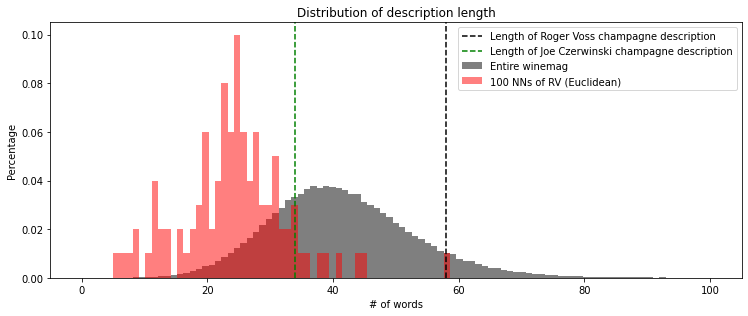

In [ ]:
plt.figure(figsize=(10.5,4.5))
bins = np.linspace(0, 100, 100)
nn_cosine_bins = np.linspace(0, 100, 100)
winemag_bins = np.linspace(0, 100, 100)
pd.cut(nearest_neighbors_euclidean['length'], 200)
plt.hist(winemag['length'], winemag_bins, label='Entire winemag', color='black', alpha=0.5, weights=[1/winemag['length'].count() for i in range(len(winemag))])
plt.hist(nearest_neighbors_euclidean['length'][:100], bins, label='100 NNs of RV (Euclidean)', color='red', alpha=0.5, weights=[1/100 for i in range(100)])
plt.xlabel('# of words')
plt.ylabel('Percentage')
plt.axvline(x=nearest_neighbors_euclidean.loc[nearest_neighbors_euclidean.index == roger_voss]['length'].values[0], color='black', linestyle='--', label='Length of Roger Voss champagne description')
plt.axvline(x=winemag.loc[winemag.index == joe_cz]['length'].values[0], color='green', linestyle='--', label='Length of Joe Czerwinski champagne description')
plt.legend(loc='upper right')
plt.title('Distribution of description length')

# Your code goes here
plt.tight_layout()

In [ ]:
# Your code goes here
cosine_dist = pairwise_distances(X=TFIDFmatrix.getrow(roger_voss), Y=TFIDFmatrix, metric='cosine')
winemag['BO-cosine-TF-IDF'] = cosine_dist.tolist()[0]

nearest_neighbors_cosine = winemag.sort_values(by='BO-cosine-TF-IDF',ascending=True)[['taster_name', 'region_1', 'title', 'variety', 'length', 'BO-cosine-TF-IDF']][:100]
print(f"chardonay from champagne: {len(nearest_neighbors_cosine.loc[(nearest_neighbors_cosine['region_1'] == 'Champagne') & (nearest_neighbors_cosine['variety'] == 'Chardonnay')])}")
nearest_neighbors_cosine

chardonay from champagne: 32


,taster_name,region_1,title,variety,length,BO-cosine-TF-IDF
89729,Roger Voss,Champagne,Salon 2006 Le Mesnil Blanc de Blancs Brut Char...,Chardonnay,58,0.000000
78358,Roger Voss,Meursault,Domaine Jacques Prieur 2014 Santenots Premier ...,Chardonnay,45,0.644436
107651,Roger Voss,Crémant de Bourgogne,Château de Lavernette NV Brut Nature (Crémant...,Chardonnay,48,0.654105
32989,Roger Voss,Crémant de Bourgogne,Château de Lavernette NV Brut Nature (Crémant...,Chardonnay,48,0.654105
59104,Roger Voss,Champagne,Roland Champion 2007 Spécial Club Chouilly Gra...,Chardonnay,49,0.673915
...,...,...,...,...,...,...
54726,Roger Voss,Pouilly-Fuissé,Château de Fuissé 2013 Vieilles Vignes (Pouil...,Chardonnay,46,0.746086
28693,Roger Voss,Crémant d'Alsace,Lucien Albrecht NV Blanc de Blancs Brut Pinot ...,Pinot Blanc,30,0.746195
22614,Roger Voss,Champagne,Jacques Picard NV Brut (Champagne),Champagne Blend,46,0.746201
58055,Roger Voss,Pouilly-Fuissé,Domaine Ferret 2012 Cuvée Hors Classe Les Méné...,Chardonnay,41,0.746319


From the glance at the above table it is quite visible that cosine mesure is most accurate of these three mesures. Top five records are French chardonanays and 4 of them are sparkling wines.

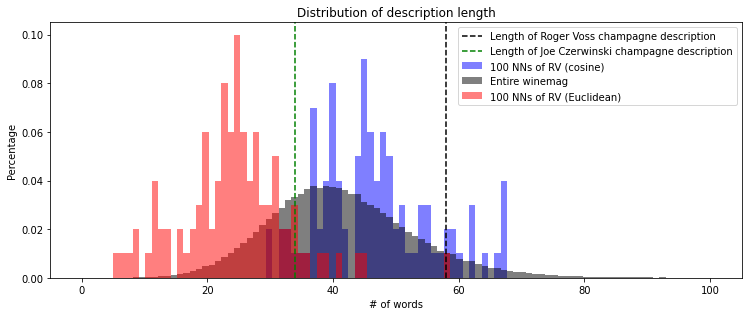

In [ ]:
plt.figure(figsize=(10.5,4.5))
bins = np.linspace(0, 100, 100)
nn_cosine_bins = np.linspace(0, 100, 100)
winemag_bins = np.linspace(0, 100, 100)
pd.cut(nearest_neighbors_euclidean['length'], 200)
plt.hist(nearest_neighbors_cosine['length'][:100], bins, label='100 NNs of RV (cosine)', color='blue', alpha=0.5, weights=[1/100 for i in range(100)])
plt.hist(winemag['length'], winemag_bins, label='Entire winemag', color='black', alpha=0.5, weights=[1/winemag['length'].count() for i in range(len(winemag))])
plt.hist(nearest_neighbors_euclidean['length'][:100], bins, label='100 NNs of RV (Euclidean)', color='red', alpha=0.5, weights=[1/100 for i in range(100)])
plt.xlabel('# of words')
plt.ylabel('Percentage')
plt.axvline(x=nearest_neighbors_euclidean.loc[nearest_neighbors_euclidean.index == roger_voss]['length'].values[0], color='black', linestyle='--', label='Length of Roger Voss champagne description')
plt.axvline(x=winemag.loc[winemag.index == joe_cz]['length'].values[0], color='green', linestyle='--', label='Length of Joe Czerwinski champagne description')
plt.legend(loc='upper right')
plt.title('Distribution of description length')

# Your code goes here
plt.tight_layout()

Indeed, the 100 nearest neighbors using cosine distance provide a sampling across the range of document lengths, rather than just short articles like Euclidean distance provided.

**Moral of the story**: In deciding the features and distance measures, check if they produce results that make sense for your particular application.